### Ce-bigFISH: image analysis toolkit for smFISH images

#### Input image info:

In [1]:
# # # Parameters if running with sbatch script
import os

# # Retrieve parameters from environment variables
# folder_name = os.getenv('FOLDER_NAME')
# output_directory = os.getenv('OUTPUT_DIRECTORY')
# z
# # Channels
# Cy5 = os.getenv('Cy5')
# mCherry = os.getenv('mCherry')
# FITC = os.getenv('FITC')
# DAPI = os.getenv('DAPI')
# brightfield = os.getenv('brightfield')

# # Microscope parameters
# wavelength_cy5 = int(os.getenv('wavelength_cy5', 670))
# wavelength_mCherry = int(os.getenv('wavelength_mCherry', 610))
# na = float(os.getenv('na', 1.42))
# refractive_index_medium = float(os.getenv('refractive_index_medium', 1.515))

# # PSF parameters
# psf_calculator = os.getenv('PSF_CALCULATOR', 'False') == 'True'
# spot_radius_ch0 = tuple(map(int, os.getenv('SPOT_RADIUS_CH0', '1409,340,340').split(',')))
# spot_radius_ch1 = tuple(map(int, os.getenv('SPOT_RADIUS_CH1', '1283,310,310').split(',')))
# voxel_size = tuple(map(int, os.getenv('VOXEL_SIZE', '1448,450,450').split(',')))

# # Image type selection
# dv_images = os.getenv('DV_IMAGES', 'False') == 'True'
# n2d_images = os.getenv('ND2D_IMAGES', 'False') == 'False'
# tiff_images = os.getenv('TIFF_IMAGES', 'False') == 'False'


# # Feature selection (convert string "True"/"False" to boolean)
# segmentation = os.getenv('SEGMENTATION', 'False') == 'False'
# spot_detection = os.getenv('SPOT_DETECTION', 'True') == 'False'

# run_mRNA_heatmaps = os.getenv('RUN_mRNA_HEATMAPS', 'True') == 'False'
# run_protein_heatmaps = os.getenv('RUN_PROTEIN_HEATMAPS', 'True') == 'False'
# analyze_rna_density = os.getenv('ANALYZE_RNA_DENSITY', 'False') == 'False'

# generate_donut_mask = os.getenv('GENERATE_DONUT_MASK', 'True') == 'False'
# generate_pgranule_mask = os.getenv('GENERATE_PGRANULE_MASK', 'True') == 'False'

# calculate_membrane_colocalization = os.getenv('CALCULATE_MEMBRANE_COLOCALIZATION', 'True') == 'False'
# calculate_nuclei_colocalization = os.getenv('CALCULATE_NUCLEI_COLOCALIZATION', 'True') == 'False'
# calculate_pgranule_colocalization = os.getenv('CALCULATE_PGRANULE_COLOCALIZATION', 'True') == 'False'
# calculate_mRNA_mRNA_colocalization = os.getenv('CALCULATE_mRNA_mRNA_COLOCALIZATION', 'True') == 'False'

# # Ensure required parameters are set
# if folder_name is None or output_directory is None:
#     raise ValueError("Both 'FOLDER_NAME' and 'OUTPUT_DIRECTORY' must be provided.")

# # Print parameters to verify
# print(f"Processing folder: {folder_name}")
# print(f"Output directory: {output_directory}")
# print(f"Image types: dv={dv_images}, nd2d={n2d_images}, tiff={tiff_images}")
# print(f"Channels: Cy5={Cy5}, mCherry={mCherry}, FITC={FITC}, DAPI={DAPI}, Brightfield={brightfield}")
# print(f"Microscope info: Wavelengths (Cy5={wavelength_cy5} nm, mCherry={wavelength_mCherry} nm), NA={na}, Refractive Index={refractive_index_medium}")
# print(f"PSF parameters: spot_radius_ch0={spot_radius_ch0}, spot_radius_ch1={spot_radius_ch1}, voxel_size={voxel_size}")
# print(f"Feature selection: PSF={psf_calculator}, Segmentation={segmentation}, Spot Detection={spot_detection}")
# print(f"Heatmaps: mRNA={run_mRNA_heatmaps}, Protein={run_protein_heatmaps}, RNA Density={analyze_rna_density}")
# print(f"Masks: Donut={generate_donut_mask}, P-Granule={generate_pgranule_mask}")
# print(f"Colocalization: Membrane={calculate_membrane_colocalization}, Nuclei={calculate_nuclei_colocalization}, P-Granule={calculate_pgranule_colocalization}, mRNA-mRNA={calculate_mRNA_mRNA_colocalization}")


In [7]:
# #Parameters if running as jupyter notebook

#Select image type
dv_images = False
n2d_images = True
tiff_images = False

# folder_name = '/pl/active/onishimura_lab/PROJECTS/naly/bigfish/nd2-nikon_files/01_nd2_test-files'
folder_name = '/pl/active/onishimura_lab/PROJECTS/naly/bigfish/nd2-nikon_files/01_nd2_test-files' #your folder should contain 2 images (.dv and its ref.dv)

# User-defined channel names (set to None if the channel does not exist)
Cy5 = "set-3_mRNA"  # (Q670)
mCherry = "lin-41_mRNA"  # (Q610)
FITC = "nothing"  # (GFP)
DAPI = "DAPI"
brightfield = "brightfield"

#info about your microscope
wavelength_cy5 = 670 # emmision peak in nm    #dv Cy5 emission = 670
wavelength_mCherry = 610  # emmision peak in nm    #dv mcherry emission = 610
na = 1.42  # numerical aperture of microscope   # dv na = 1.42
refractive_index_medium = 1.518 # oil refractive index  #dv ri 1.515

#Select features to calculate
psf_calculator = True
spot_radius_ch0 = (1006, 287, 287)  # PSF Z,Y,X #Settings used for dv analysis so far 250218 (1409, 340, 340)
spot_radius_ch1 = (916, 262, 262)  # PSF Z,Y,X #Settings used for dv analysis so far 250218 (1283, 310, 310)
voxel_size = (200, 6450, 6450)   # Microscope pixel size in nm (Z,Y,X) #Settings used for dv analysis so far 250218 (1448, 450, 450)

segmentation = False
spot_detection = True

run_mRNA_heatmaps = True
run_protein_heatmaps = True
analyze_rna_density = False

generate_donut_mask = True
generate_pgranule_mask = True

calculate_membrane_colocalization = True
calculate_nuclei_colocalization = True
calculate_pgranule_colocalization = True
calculate_mRNA_mRNA_colocalization = True


In [8]:
# PSF calculator 
if psf_calculator:
    # #ch0 - 670 channel (Cy5)
    # Calculate lateral PSF for Cy5 channel using Em λ
    fwhm_xy_cy5 = 0.61 * wavelength_cy5 / na
    # Calculate axial PSF for Cy5 channel
    fwhm_z_cy5 = 2 * refractive_index_medium * wavelength_cy5 / na**2
    # # Print the result
    print(f"Lateral (xy) PSF for Cy5 channel: {fwhm_xy_cy5} nm")
    print(f"Axial (z) PSF for Cy5 channel with 60x oil objective: {fwhm_z_cy5} nm")


    # #ch1 - mCherry channel
    # Calculate lateral PSF for mCherry using Em λ
    fwhm_xy = 0.61 * wavelength_mCherry / na
    # Calculate axial PSF
    fwhm_z = 2 * refractive_index_medium * wavelength_mCherry / na**2
    # # Print the result
    print(f"Lateral (xy) PSF: {fwhm_xy} nm")
    print(f"Axial (z) PSF with 60x oil objective: {fwhm_z} nm")



Lateral (xy) PSF for Cy5 channel: 287.8169014084507 nm
Axial (z) PSF for Cy5 channel with 60x oil objective: 1008.7879389010118 nm
Lateral (xy) PSF: 262.0422535211267 nm
Axial (z) PSF with 60x oil objective: 918.4487204919659 nm


In [9]:
#import packages:
import os
import matplotlib.pyplot as plt
import numpy as np

import tifffile
import bigfish
import bigfish.stack as stack
import bigfish.plot as plot
import bigfish.multistack as multistack
import bigfish.detection as detection

import cellpose
from cellpose import models
# from cellpose import plot
import pandas as pd
import skimage
from skimage.measure import label, regionprops
from skimage.morphology import square, dilation,erosion
from skimage import measure, morphology
from skimage.morphology import disk, binary_erosion


from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
from PIL import Image

import plotly.graph_objects as go
from skimage.morphology import disk, binary_erosion

from skimage.transform import resize
from matplotlib.colors import ListedColormap


import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import cv2
import tifffile

# pip install plotly
# pip install ipywidgets
# pip install ipympl

# pip install nd2
import nd2

from mpl_toolkits.mplot3d import Axes3D
import cv2
import matplotlib.patches as patches
from scipy.ndimage import rotate
from scipy.ndimage import center_of_mass

import multiprocessing as mp

from IPython.display import Audio
from scipy.ndimage import gaussian_filter
from scipy.spatial import cKDTree
from scipy.ndimage import label

from skimage import measure, morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize


#### Image dimensions sanity check:

In [10]:
# #Read in Deltavision files

if dv_images:
    # Reading the microscopy data
    current_directory = os.getcwd()
    folder_path = os.path.join(current_directory, folder_name)

    if os.path.exists(folder_path):
        # List the files in the folder
        list_filenames = os.listdir(folder_path)
        list_filenames = sorted(list_filenames)
        path_files = [os.path.join(folder_path, filename) for filename in list_filenames if not filename.startswith('.ipynb_checkpoints')]

        # Read DV files and store image stacks in list_images
        list_images = []
        for image in path_files:
            image_stack = stack.read_dv(image)
            list_images.append(image_stack)

    # Extract Image ID by removing the "_R3D_REF.dv" suffix
    dv_filename = list_filenames[1]
    if dv_filename.endswith("_R3D_REF.dv"):
        image_name = dv_filename[:-len("_R3D_REF.dv")]
    else:
        image_name = dv_filename
    print(f'Image ID: {image_name}', '\n')

    # Converting the image to a specific shape
    bf = list_images[1]  # [C,Z,Y,X]
    image_colors = list_images[0]  # Reference [Y,X]

    bf = bf.astype(np.uint16)
    image_colors = image_colors.astype(np.uint16)

    print(f'Image colors \n{list_filenames[0]}: {image_colors.shape} \n')
    print(f'Brightfield \n{list_filenames[1]}: {bf.shape}')

    # Create output folder if it doesn't exist
    output_directory = os.path.join(folder_path, "output")
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
        
        
    # Explicitly assign channels from image_colors and bf
    Cy5_array = image_colors[0, :, :, :] if image_colors[0] is not None else None
    mCherry_array = image_colors[1, :, :, :] if image_colors[1] is not None else None
    FITC_array = image_colors[2, :, :, :] if image_colors[2] is not None else None
    nuclei_array = image_colors[3, :, :, :] if image_colors[3] is not None else None
    bf = bf if brightfield is not None else None


    # Explicitly assign channels from image_colors and bf
    image_Cy5 = np.max(image_colors[0, :, :, :], axis=0) if image_colors[0] is not None else None
    image_mCherry = np.max(image_colors[1, :, :, :], axis=0) if image_colors[1] is not None else None
    image_FITC = np.max(image_colors[2, :, :, :], axis=0) if image_colors[2] is not None else None
    image_nuclei = np.max(image_colors[3, :, :, :], axis=0) if image_colors[3] is not None else None
    bf = bf if brightfield is not None else None

    # Combine images into a list
    images = [image_Cy5, image_mCherry, image_FITC, image_nuclei, bf]
    titles = [Cy5, mCherry, FITC, DAPI, brightfield]

    # Filter out None entries
    filtered_images = [(img, title) for img, title in zip(images, titles) if img is not None]

    # Plot the filtered images
    fig, ax = plt.subplots(1, len(filtered_images), figsize=(6 * len(filtered_images), 8))

    # Ensure ax is iterable
    if len(filtered_images) == 1:
        ax = [ax]

    for i, (img, title) in enumerate(filtered_images):
        ax[i].imshow(img, cmap="gray")
        ax[i].set_title(title, size=20)
        ax[i].axis("off")

    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(os.path.join(output_directory, f'colors_{image_name}.png'))
    plt.show()

Image ID: 1085_crop.nd2

Image colors 
1085_crop.nd2: (72, 5, 900, 1300)



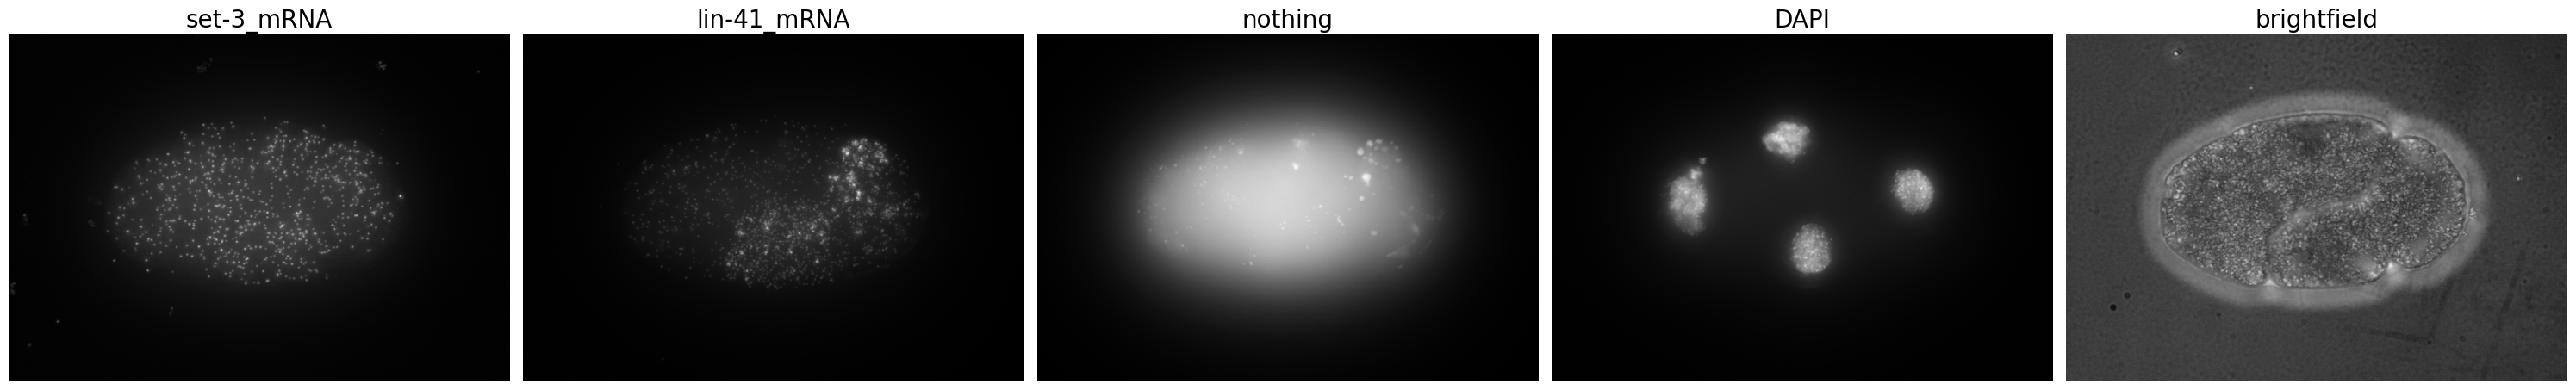

In [15]:
# Process n2d images

if n2d_images:
    # Reading the microscopy data
    current_directory = os.getcwd()
    folder_path = os.path.join(current_directory, folder_name)

    if os.path.exists(folder_path):
        # List the files in the folder
        list_filenames = os.listdir(folder_path)
        list_filenames = sorted(list_filenames)
        path_files = [
            os.path.join(folder_path, filename)
            for filename in list_filenames
            if not filename.startswith(".ipynb_checkpoints")
        ]

        # Read ND2 files and store image stacks in list_images
        list_images = []
        for image in path_files:
            image_stack = nd2.imread(image)  # Read ND2 image
            list_images.append(image_stack)

    # Extract Image ID
    image_name = list_filenames[0]
    print(f"Image ID: {image_name}\n")

    # Check the dimensions of the first image stack
    image_colors = list_images[0]  # Example shape: [T, C, Y, X]
    print(f"Image colors \n{list_filenames[0]}: {image_colors.shape}\n")


    # Create output folder if it doesn't exist
    output_directory = os.path.join(folder_path, "output")
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)


    # Define channel names and process max projections
    channels = [Cy5, mCherry, FITC, DAPI, brightfield]
    titles = channels

    # Explicitly assign channels from image_colors and bf
    Cy5_array = image_colors[:, 0, :, :] if image_colors[0] is not None else None
    mCherry_array = image_colors[:, 1, :, :] if image_colors[1] is not None else None
    FITC_array = image_colors[:, 2, :, :] if image_colors[2] is not None else None
    nuclei_array = image_colors[:, 3, :, :] if image_colors[3] is not None else None
    bf = image_colors[:, 4, :, :] if image_colors[4] is not None else None
    
    # Explicitly process each channel
    image_Cy5 = np.max(image_colors[:, 0, :, :], axis=0) if Cy5 else None
    image_mCherry = np.max(image_colors[:, 1, :, :], axis=0) if mCherry else None
    image_FITC = np.max(image_colors[:, 2, :, :], axis=0) if FITC else None
    image_nuclei = np.max(image_colors[:, 3, :, :], axis=0) if DAPI else None
    bf = np.max(image_colors[:, 4, :, :], axis=0) if brightfield else None ## something diff here

    # Combine the images into a list
    images = [image_Cy5, image_mCherry, image_FITC, image_nuclei, bf]

    # Filter out None entries
    filtered_images = [(img, title) for img, title in zip(images, titles) if img is not None]

    # Plotting the images
    fig, ax = plt.subplots(1, len(filtered_images), figsize=(6 * len(filtered_images), 8))

    # Ensure ax is always iterable, even if there's only one plot
    if len(filtered_images) == 1:
        ax = [ax]

    for i, (img, title) in enumerate(filtered_images):
        ax[i].imshow(img, cmap="gray")
        ax[i].set_title(title, size=20)
        ax[i].axis("off")

    # Adjust layout and save the plots in the results folder
    plt.tight_layout()
    plt.savefig(os.path.join(output_directory, "colors_" + image_name + ".png"))
    plt.show()


In [17]:
output_directory

'/pl/active/onishimura_lab/PROJECTS/naly/bigfish/nd2-nikon_files/01_nd2_test-files/output'

### 1. Segmentation

In [ ]:
# #Manual and interactive segmentation
# import ipywidgets as widgets
# from IPython.display import display
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# import tifffile

class ManualSegmentation():
 
    def __init__(self, image, cmap='Spectral', polygon_color=(255, 0, 0)):
        self.ipython = get_ipython()
        if self.ipython:
            self.ipython.run_line_magic('matplotlib', 'widget')

        self.image = self.process_image(image)
        self.polygon_color = polygon_color
        self.selected_points = []

        self.figure_to_draw_points, self.axes_in_figure = plt.subplots(figsize=(5, 5))
        self.new_image = self.axes_in_figure.imshow(self.image, cmap=cmap)

        self.click = self.figure_to_draw_points.canvas.mpl_connect('button_press_event', self.onclick)

    def process_image(self, image):
#         processed_image = RemoveExtrema(image, min_percentile=0.1, max_percentile=99).remove_outliers()
        processed_image = image
        processed_image = (processed_image - processed_image.min()) / (processed_image.max() - processed_image.min()) * 255
        return processed_image

    def polygon(self, new_image, points_in_polygon):
        points_in_polygon = np.array(points_in_polygon, np.int32)
        points_in_polygon = points_in_polygon.reshape((-1, 1, 2))
        cv2.polylines(new_image, [points_in_polygon], isClosed=True, color=self.polygon_color, thickness=3)
        return new_image

    def switch_to_inline(self):
        if self.ipython:
            self.ipython.run_line_magic('matplotlib', 'inline')
        plt.show()  # Ensure that any existing plots are displayed
        return None

    def onclick(self, event):
        if event.xdata is not None and event.ydata is not None:
            self.selected_points.append([int(event.xdata), int(event.ydata)])
            updated_image = self.polygon(np.copy(self.image), self.selected_points)
            
            for point in self.selected_points:
                cv2.circle(updated_image, tuple(point), radius=3, color=self.polygon_color, thickness=-1)
            
            self.new_image.set_data(updated_image)
        return None

    def close_and_save(self, filename='temp_mask.tif', save_mask=True):
        if self.selected_points:
            # Create an empty array with the same shape as the image slice
            mask = np.zeros(self.image.shape[:2], dtype=np.uint8)

            # Convert selected points to a numpy array for cv2.fillPoly
            mask_array = np.array([self.selected_points], dtype=np.int32)

            # Create the mask
            cv2.fillPoly(mask, mask_array, 255)  # Fill with white (255)

            if save_mask:
                # Save the mask as a tif file
                tifffile.imwrite(filename, mask, dtype='uint8')
                print(f'Mask saved as {filename}')

            # Close the figure and disconnect the click
            self.figure_to_draw_points.canvas.mpl_disconnect(self.click)
            plt.close(self.figure_to_draw_points)
            plt.close()

            self.switch_to_inline()  # Switch back to inline when closing the plot
            return mask.astype(bool)
        else:
            print('No points selected to create a mask.')
            plt.close()
            return None


# Example usage:
mask_object = ManualSegmentation(
    image=np.max(image_colors[2,:,:,:],axis=0), 
    cmap='Spectral'
)  # NOTICE THAT FOR THE MASK SELECTION WE USE THE GREEN CHANNEL (channel 1)


# # #Test
# import ipywidgets as widgets
# from IPython.display import display

# # Create a simple slider widget
# slider = widgets.IntSlider(value=50, min=0, max=100, step=1, description='Slider:')

# # Display the slider
# display(slider)

# # Function to update based on slider value
# def on_value_change(change):
#     print(f'Slider value changed to: {change["new"]}')

# # Attach the function to the slider
# slider.observe(on_value_change, names='value')

#### 1.1 Single cell segmentation (up to 4-cell embryos)

In [19]:
# Additional functions used for segmentation
def is_nucleus_in_cytosol(mask_n, mask_c):
    mask_n[mask_n>1]=1
    mask_c[mask_c>1]=1
    size_mask_n = np.count_nonzero(mask_n)
    size_mask_c = np.count_nonzero(mask_c)
    min_size =np.min( (size_mask_n,size_mask_c) )
    mask_combined =  mask_n + mask_c
    sum_mask = np.count_nonzero(mask_combined[mask_combined==2])
    if (sum_mask> min_size*0.8) and (min_size>200): # the element is inside if the two masks overlap over the 80% of the smaller mask.
        return 1
    else:
        return 0
    
def remove_lonely_masks(masks_0, masks_1,is_nuc=None):
    n_mask_0 = np.max(masks_0)
    n_mask_1 = np.max(masks_1)
    if (n_mask_0>0) and (n_mask_1>0):
        for ind_0 in range(1,n_mask_0+1):
            tested_mask_0 = erosion(np.where(masks_0 == ind_0, 1, 0))
            array_paired= np.zeros(n_mask_1)
            for ind_1 in range(1,n_mask_1+1):
                tested_mask_1 = erosion(np.where(masks_1 == ind_1, 1, 0))
                array_paired[ind_1-1] = is_nucleus_in_cytosol(tested_mask_1, tested_mask_0)
                if (is_nuc =='nuc') and (np.count_nonzero(tested_mask_0) > np.count_nonzero(tested_mask_1) ):
                    # condition that rejects images with nucleus bigger than the cytosol
                    array_paired[ind_1-1] = 0
                elif (is_nuc is None ) and (np.count_nonzero(tested_mask_1) > np.count_nonzero(tested_mask_0) ):
                    array_paired[ind_1-1] = 0
            if any (array_paired) == False: # If the cytosol is not associated with any mask.
                masks_0 = np.where(masks_0 == ind_0, 0, masks_0)
            masks_with_pairs = masks_0
    else:
        masks_with_pairs = np.zeros_like(masks_0)
    return masks_with_pairs

def matching_masks(masks_cyto, masks_nuclei):
    n_mask_cyto = np.max(masks_cyto)
    n_mask_nuc = np.max(masks_nuclei)
    new_masks_nuclei = np.zeros_like(masks_cyto)
    reordered_mask_nuclei = np.zeros_like(masks_cyto)
    if (n_mask_cyto>0) and (n_mask_nuc>0):
        for mc in range(1,n_mask_cyto+1):
            tested_mask_cyto = np.where(masks_cyto == mc, 1, 0)
            for mn in range(1,n_mask_nuc+1):
                mask_paired = False
                tested_mask_nuc = np.where(masks_nuclei == mn, 1, 0)
                mask_paired = is_nucleus_in_cytosol(tested_mask_nuc, tested_mask_cyto)
                if mask_paired == True:
                    if np.count_nonzero(new_masks_nuclei) ==0:
                        new_masks_nuclei = np.where(masks_nuclei == mn, -mc, masks_nuclei)
                    else:
                        new_masks_nuclei = np.where(new_masks_nuclei == mn, -mc, new_masks_nuclei)
            reordered_mask_nuclei = np.absolute(new_masks_nuclei)
    return reordered_mask_nuclei

def remove_extreme_values(image,min_percentile=0.1, max_percentile=99.5):
    max_val = np.percentile(image, max_percentile)
    min_val = np.percentile(image, min_percentile)
    image [image < min_val] = min_val
    image [image > max_val] = max_val
    return image

def metric_max_cells_and_area( masks):
    n_masks = np.max(masks)
    if n_masks > 1: # detecting if more than 1 mask are detected per cell
        size_mask = []
        for nm in range (1, n_masks+1): # iterating for each mask in a given cell. The mask has values from 0 for background, to int n, where n is the number of detected masks.
            approximated_radius = np.sqrt(np.sum(masks == nm)/np.pi)  # a=  pi r2
            size_mask.append(approximated_radius) #np.sum(masks == nm)) # creating a list with the size of each mask
        size_masks_array = np.array(size_mask)
        metric = np.mean(size_masks_array).astype(int) * n_masks
    elif n_masks == 1: # do nothing if only a single mask is detected per image.
        approximated_radius = np.sqrt(np.sum(masks == 1)/np.pi) 
        metric = approximated_radius.astype(int)
    else:  # return zero if no mask are detected
        metric = 0  
    return metric   

def nuclear_segmentation(image_nuclei):
    MIN_CELL_SIZE = 1000
    list_masks_nuclei = []
#     list_thresholds = np.arange(0.7,0.95, 0.05) # for dv images
    list_thresholds = np.arange(0.7,0.95, 0.05) # for nd2 images
    array_number_detected_masks = np.zeros(len(list_thresholds))
    for i,tested_ts in enumerate(list_thresholds):
        image_nuclei_binary = image_nuclei.copy()
        max_value_image = np.max(image_nuclei_binary)
        image_nuclei_binary[image_nuclei_binary < max_value_image*tested_ts] = 0
        image_nuclei_binary[image_nuclei_binary > max_value_image*tested_ts] = 1
        labels = measure.label(image_nuclei_binary)
        filtered_labels = morphology.remove_small_objects(labels, min_size=MIN_CELL_SIZE)
        unique_filtered_labels = np.unique(filtered_labels)
        tested_masks_nuclei = np.zeros_like(filtered_labels)
        for idx, old_label in enumerate(unique_filtered_labels):
            tested_masks_nuclei[filtered_labels == old_label] = idx
        list_masks_nuclei.append(tested_masks_nuclei)
        array_number_detected_masks[i]= metric_max_cells_and_area( tested_masks_nuclei) 
    selected_index = np.argmax(array_number_detected_masks)
    masks_nuclei = list_masks_nuclei [selected_index]
    return masks_nuclei

def cytosol_segmentation(image_cytosol,second_image_cytosol,cytosol_diameter):
    flow_ts=1
    MIN_CELL_SIZE = 1000
    model = models.Cellpose(gpu=True, model_type='cyto2') # model_type='cyto', 'cyto2' or model_type='nuclei'
    if not (second_image_cytosol is None):
        merged_image_cytosol = np.concatenate((image_cytosol[:, :, np.newaxis], second_image_cytosol[:, :, np.newaxis]), axis=2)
        masks_cytosol_unfiltered = model.eval(merged_image_cytosol, diameter=cytosol_diameter, flow_threshold=flow_ts, channels=[0,1])[0]
    else:
        masks_cytosol_unfiltered = model.eval(image_cytosol, diameter=cytosol_diameter, flow_threshold=flow_ts, channels=[0,0])[0]
    filtered_cyto = morphology.remove_small_objects(masks_cytosol_unfiltered, min_size=MIN_CELL_SIZE)
    unique_filtered_cyto = np.unique(filtered_cyto)
    masks_cytosol = np.zeros_like(filtered_cyto)
    for idx, old_label in enumerate(unique_filtered_cyto):
        masks_cytosol[filtered_cyto == old_label] = idx
    return masks_cytosol



In [20]:
def segmentation_optimization(image_cytosol,image_nuclei,cytosol_diameter,second_image_cytosol=None):
    # Cytosol segmentation
    masks_cytosol =cytosol_segmentation(image_cytosol,second_image_cytosol,cytosol_diameter)
    # Nuclear segmentation
    masks_nuclei = nuclear_segmentation(image_nuclei)
    # reordering nuclei masks
    masks_nuclei = matching_masks(masks_cytosol,masks_nuclei)
    # remove masks without nuclei
    masks_nuclei= remove_lonely_masks(masks_0=masks_nuclei , masks_1=masks_cytosol,is_nuc='nuc')
    masks_cytosol= remove_lonely_masks(masks_0=masks_cytosol , masks_1=masks_nuclei)
    # calculate size of masks
    number_masks_cyto = np.max(masks_cytosol)
    list_masks_cyto_sizes =[]
    for i in range (1, number_masks_cyto+1):
        list_masks_cyto_sizes.append(len(masks_cytosol[masks_cytosol==i]) )
    number_masks_nuc = np.max(masks_nuclei)
    list_masks_nuc_sizes =[]
    for i in range (1, number_masks_nuc+1):
        list_masks_nuc_sizes.append(len(masks_nuclei[masks_nuclei==i]) )
    return masks_nuclei, masks_cytosol,list_masks_nuc_sizes, list_masks_cyto_sizes

In [21]:
# Codes used to segment the nucleus and the cytosol
def segmentation(image_cytosol,image_nuclei, second_image_cytosol=None):
    # removing outliers in image
    image_cytosol = remove_extreme_values(image=image_cytosol,min_percentile=0.1, max_percentile=99.5)
    if not (second_image_cytosol is None):
        second_image_cytosol = remove_extreme_values(image=second_image_cytosol,min_percentile=0.1, max_percentile=99.5)
    image_nuclei = remove_extreme_values(image=image_nuclei,min_percentile=0.1, max_percentile=99.5)
    # Optimization segmentation
    list_masks_nuclei = []
    list_masks_cytosol=[]
    list_masks_nuc_sizes =[]
    list_masks_cyto_sizes=[]
    list_flow_thresholds = np.arange(40, 200, 10)
    array_number_detected_masks = np.zeros(len(list_flow_thresholds))
    for i,tested_ts in enumerate(list_flow_thresholds):
        tested_masks_nuclei, tested_masks_cytosol, tested_list_masks_nuc_sizes, tested_list_masks_cyto_sizes = segmentation_optimization(image_cytosol,image_nuclei,cytosol_diameter=tested_ts,second_image_cytosol=second_image_cytosol)
        list_masks_nuclei.append(tested_masks_nuclei)
        list_masks_cytosol.append(tested_masks_cytosol)
        list_masks_nuc_sizes.append(tested_list_masks_nuc_sizes)
        list_masks_cyto_sizes.append(tested_list_masks_cyto_sizes)
        array_number_detected_masks[i]= metric_max_cells_and_area( tested_masks_cytosol) + metric_max_cells_and_area( tested_masks_nuclei)
    selected_index = np.argmax(array_number_detected_masks)
    masks_nuclei = list_masks_nuclei [selected_index]
    masks_cytosol = list_masks_cytosol [selected_index]
    masks_nuc_sizes = list_masks_nuc_sizes[selected_index]
    masks_cyto_sizes = list_masks_cyto_sizes[selected_index]
    
        # Plotting
    color_map = 'Greys_r'
    fig, ax = plt.subplots(1,4, figsize=(14, 4))
    # Plotting the heatmap of a section in the image
    ax[0].imshow(image_nuclei,cmap=color_map)
    ax[1].imshow(masks_nuclei,cmap=color_map)
    ax[2].imshow(image_cytosol,cmap=color_map)
    ax[3].imshow(masks_cytosol,cmap=color_map)
    ax[0].set(title='DAPI'); ax[0].axis('off');ax[0].grid(False)
    ax[1].set(title='mask nuclei'); ax[1].axis('off');ax[1].grid(False)
    ax[2].set(title='brightfield'); ax[2].axis('off');ax[2].grid(False)
    ax[3].set(title='mask cytosol'); ax[3].axis('off');ax[3].grid(False)
    
    return masks_cytosol, masks_nuclei, masks_cyto_sizes, masks_nuc_sizes

In [ ]:
# # Run segmentation functions
if segmentation:
    image_cytosol = bf
    second_image_cytosol = image_nuclei
    masks_cytosol, masks_nuclei,list_masks_cyto_sizes, list_masks_nuc_sizes = segmentation(image_cytosol,image_nuclei,second_image_cytosol)

    segmentation_filename = os.path.join(output_directory, 'segmentation_' + image_name + '.png')

    # Save the figure
    plt.savefig(segmentation_filename)

In [ ]:
segmentation_filename

In [30]:
def get_features_from_masks(img, masks):
    
    valid_masks = []
    for i in range(1,np.max(masks)+1):
        if (masks == i).sum()!=0:
            valid_masks.append(i)
            
    features = np.zeros([1, len(valid_masks)])
    print(valid_masks)
    for n in range(len(valid_masks)):
        features[0,n] = np.mean(img[4]*(masks==valid_masks[n]))
    return features

get_features_from_masks(image_colors, masks_cytosol)

[2, 4, 6, 7]


array([[63.51987214, 73.76188479, 45.04798598, 38.65402239]])

### 2. Spot detection

#### 2.1 Spot detection (automated threshold selection and spot detection)

In [11]:
#@title Codes used for spot detection
# Note: spot radius = Point Spread Function (PSF)

def spot_detection(rna,voxel_size,spot_radius,masks_cytosol):
    spots, threshold = detection.detect_spots(
        images= rna,
        return_threshold=True,
        voxel_size=voxel_size,
        spot_radius=spot_radius) 

    spot_radius_px = detection.get_object_radius_pixel(
        voxel_size_nm=voxel_size,
        object_radius_nm=spot_radius,
        ndim=3) 

    # LoG filter
    rna_log = stack.log_filter(rna, sigma=spot_radius_px)

    # local maximum detection
    mask = detection.local_maximum_detection(rna_log, min_distance=spot_radius_px)

    # thresholding
    threshold = detection.automated_threshold_setting(rna_log, mask)
    spots, _ = detection.spots_thresholding(rna_log, mask, threshold)


    # Decompose regions by simulating as many spots as possible until we match the original region intensity.
    #spots_post_decomposition = spots.copy()
    spots_post_decomposition, dense_regions, reference_spot = detection.decompose_dense(
        image=rna,
        spots=spots,
        voxel_size=voxel_size,
        spot_radius=spot_radius,
        alpha=0.7,  # alpha impacts the number of spots per candidate region
        beta=1,  # beta impacts the number of candidate regions to decompose
        gamma=5)  # gamma the filtering step to denoise the image

    # define clusters
    spots_post_clustering, clusters = detection.detect_clusters(
        spots=spots_post_decomposition,
        voxel_size=voxel_size,
        radius=1000, #626
        nb_min_spots=10)

    #plotting
#     print(f"Image ID: {image_name} \n")
    print(f"{rna_channel} detection")
    print(f" threshold: {threshold}")
    print("\r spots: {0}".format(spots_post_clustering.shape[0]))
    print("\r clusters: {0}".format(clusters.shape[0]))
   
        #elbow plot
    threshold_output = os.path.join(output_directory, rna_channel + '_threshold_' + image_name)
    plot.plot_elbow(
        images=rna,
        voxel_size=voxel_size,
        spot_radius=spot_radius,
        size_axes=8,
        framesize=(5, 3),
        title=(f"{rna_channel} detection threshold"),
        size_title=12,
        path_output=threshold_output,
        show=True  # Set show to False to hide the plot
    )



    #    # Save the plots in the results folder
    detection_output = os.path.join(output_directory, rna_channel + '_detection_' + image_name)
    plot.plot_detection(
        image=np.max(rna, axis=0),
        spots=[spots_post_decomposition, clusters[:, :3]],
        shape=["circle", "polygon"],
        radius=[1, 4],
        color=detection_color,
        linewidth=[3, 2],
        fill=[False, True],
        contrast=True,
        framesize=(10, 5),
        title=(f"{rna_channel} detection"),
        path_output= detection_output,
        show=True
    )

    #spots_no_ts, _, ts = multistack.remove_transcription_site(spotDetectionCSV, clusterDetectionCSV, mask_nuc, ndim=3)
    #spots_in_region, _ = multistack.identify_objects_in_region(mask, spots_post_clustering[:,:3], ndim=3)

    # Separating and counting the spots in each cell
    number_masks_cyto = np.max(masks_cytosol)
    list_spots_in_each_cell =[]
    list_clusters_in_each_cell =[]
    for i in range (1, number_masks_cyto+1):
        temp_cyto_mask= np.zeros_like(masks_cytosol)
        temp_cyto_mask[masks_cytosol == i] = i
        spots_in_region, _ = multistack.identify_objects_in_region(mask=temp_cyto_mask, coord=spots_post_clustering[:,:3], ndim=3)
        clusters_in_region,_ = multistack.identify_objects_in_region(mask=temp_cyto_mask, coord=clusters[:,:3], ndim=3)
        list_spots_in_each_cell.append(len(spots_in_region))
        list_clusters_in_each_cell.append(len( clusters_in_region ))
        del spots_in_region, clusters_in_region
    return spots_post_clustering, clusters, list_spots_in_each_cell, list_clusters_in_each_cell

In [12]:
# #Run spot detection functions
if spot_detection:
    if Cy5 is not None and image_Cy5 is not None:
        rna_ch0 = Cy5_array # [Z,Y,X,C]
    #     rna_ch0 = rna_ch0.astype(np.uint16)
        rna_channel = Cy5
        detection_color = "red"
        spots_post_clustering_ch0, clusters_ch0,list_spots_in_each_cell_ch0,list_clusters_in_each_cell_ch0 = spot_detection(rna_ch0,voxel_size,spot_radius_ch0,masks_cytosol)

    if mCherry is not None and image_mCherry is not None:
        rna_ch1 = mCherry_array # [Z,Y,X,C]
    #     rna_ch1 = rna_ch1.astype(np.uint16)
        rna_channel = mCherry
        detection_color = "blue"
        spots_post_clustering_ch1, clusters_ch1,list_spots_in_each_cell_ch1,list_clusters_in_each_cell_ch1 = spot_detection(rna_ch1,voxel_size,spot_radius_ch1,masks_cytosol)


ValueError: The array should have an upper bound of 1, but its maximum value is 9.779763273699668.

#### 2.2 Save mRNA counts as a dataframe

In [ ]:
# # Export as csv
# Initialize an empty DataFrame
df_quantification = pd.DataFrame()

# Calculate the sum of each list if they are not None
if 'list_spots_in_each_cell_ch0' in locals() and list_spots_in_each_cell_ch0 is not None:
    sum_spots_ch0 = sum(list_spots_in_each_cell_ch0)
else:
    sum_spots_ch0 = None
    list_spots_in_each_cell_ch0 = []

if 'list_spots_in_each_cell_ch1' in locals() and list_spots_in_each_cell_ch1 is not None:
    sum_spots_ch1 = sum(list_spots_in_each_cell_ch1)
else:
    sum_spots_ch1 = None
    list_spots_in_each_cell_ch1 = []

# Check if any sum is not None and skip appending to df_quantification if all are None
if any(x is not None for x in [sum_spots_ch0, sum_spots_ch1]):
    # Create a data dictionary with summarized values
    data = {
        'Image ID': image_name,
        f'{Cy5} total molecules': sum_spots_ch0,  # Generalized label for channel 0
        f'{mCherry} total molecules': sum_spots_ch1,  # Generalized label for channel 1
    }

    # Add per-cell information as individual columns for Cy5 (channel 0)
    for i, value in enumerate(list_spots_in_each_cell_ch0):
        data[f'{Cy5} cell_{chr(65 + i)}'] = value  # Generalized label, e.g., Cy5_cell_A, Cy5_cell_B, etc.

    # Add per-cell information as individual columns for mCherry (channel 1)
    for i, value in enumerate(list_spots_in_each_cell_ch1):
        data[f'{mCherry} cell_{chr(65 + i)}'] = value  # Generalized label, e.g., mCherry_cell_A, mCherry_cell_B, etc.

    # Count the number of nuclei to categorize embryos automatically
    # Label the connected regions
    labeled_array, num_features = label(masks_nuclei)

    # Add `cell_stage` as a new column
    data['cell_stage'] = num_features

    # Append the data as a new row to the DataFrame
    df_quantification = pd.concat([df_quantification, pd.DataFrame([data])], ignore_index=True)

    # Save the DataFrame to CSV
    quantification_output = os.path.join(output_directory, 'quantification_' + image_name + '.csv')
    df_quantification.to_csv(quantification_output, index=False)

# Dynamically generate column order for cells
cy5_cell_columns = [f'{Cy5} cell_{chr(65 + i)}' for i in range(len(list_spots_in_each_cell_ch0))]
mcherry_cell_columns = [f'{mCherry} cell_{chr(65 + i)}' for i in range(len(list_spots_in_each_cell_ch1))]

# Define the new column order (generalized with Cy5 and mCherry)
new_column_order = ['Image ID', 'cell_stage'] + cy5_cell_columns + [f'{Cy5} total molecules'] + mcherry_cell_columns + [f'{mCherry} total molecules']

# Reorganize the DataFrame columns
df_quantification = df_quantification[new_column_order]

# Display the DataFrame (optional)
df_quantification


#### 2.3 mRNA Abundance Heatmap

In [ ]:
# Generate heatmaps of mRNA abundance in each channel

if run_mRNA_heatmaps:
    def create_heatmap(spots_x, spots_y, masks_cytosol, masks_nuclei, output_filename, title_suffix, grid_width=80, grid_height=80):
        # Calculate the width and height of each grid cell
        img_width, img_height = masks_cytosol.shape[1], masks_cytosol.shape[0]
        cell_width = img_width / grid_width
        cell_height = img_height / grid_height

        # Create an empty grid to store the spot counts
        grid = np.zeros((grid_height, grid_width), dtype=int)

        # Count spots in each grid cell
        for x, y in zip(spots_x, spots_y):
            # Determine which grid cell the spot belongs to
            cell_x = int(x / cell_width)
            cell_y = int(y / cell_height)

            # Increment the count in the corresponding grid cell
            if 0 <= cell_x < grid_width and 0 <= cell_y < grid_height:
                grid[cell_y, cell_x] += 1

        # Create a heatmap
        plt.imshow(masks_cytosol, cmap='gray')  # Display the original image
        plt.imshow(masks_nuclei, cmap='gray')
        plt.imshow(grid, cmap='CMRmap', alpha=1, interpolation='nearest')  # Overlay the heatmap
        plt.title(f'mRNA Abundance Heatmap ({title_suffix})')
        plt.axis('off')

        # Create a vertical color bar
        cbar = plt.colorbar(orientation='vertical', shrink=0.5)  # Adjust the shrink parameter to make it smaller
        cbar.ax.text(1, 1.05, 'Higher\nlevels', transform=cbar.ax.transAxes, ha='center')
        cbar.ax.text(1, -0.19, 'Lower\nlevels', transform=cbar.ax.transAxes, ha='center')
        cbar.set_ticks([])

        # Save the plots in the results folder
        plt.savefig(output_filename)
        plt.show()
    #     plt.close()

        # Return the grid for further processing
        return grid

    # Initialize variables for storing the heatmaps
    cy5_heatmap = None
    mcherry_heatmap = None

    # Generate heatmap for channel 0 (Cy5) if spots_post_clustering_ch0 is defined
    if 'spots_post_clustering_ch0' in locals():
        spots_x_ch0 = spots_post_clustering_ch0[:, 2]
        spots_y_ch0 = spots_post_clustering_ch0[:, 1]
        cy5_heatmap = create_heatmap(spots_x_ch0, spots_y_ch0, masks_cytosol, masks_nuclei, os.path.join(output_directory, f'{Cy5}_heatmap.png'), Cy5)

    # Generate heatmap for channel 1 (mCherry) if spots_post_clustering_ch1 is defined
    if 'spots_post_clustering_ch1' in locals():
        spots_x_ch1 = spots_post_clustering_ch1[:, 2]
        spots_y_ch1 = spots_post_clustering_ch1[:, 1]
        mcherry_heatmap = create_heatmap(spots_x_ch1, spots_y_ch1, masks_cytosol, masks_nuclei, os.path.join(output_directory, f'{mCherry}_heatmap.png'), mCherry)



In [ ]:
# #Tidy up before plotting

# Clean arrays to calculate special features in 3D
ch0_array = spots_post_clustering_ch0
# Check if the array has exactly 4 columns
if ch0_array.shape[1] == 4 :
    # Remove the last column
    ch0_array = ch0_array[:, :-1]
#     print("Last column removed.")
else:
    # Keep the array unchanged
    ch0_array  = ch0_array
#     print("Array unchanged.")

# Display the cleaned array
# print("Cleaned ch0 array:")
# print(ch0_array)

print("\n")

# Original array (example)
ch1_array = spots_post_clustering_ch1
# Check if the array has exactly 4 columns 
if ch1_array.shape[1] == 4 :
    # Remove the last column
    ch1_array = ch1_array[:, :-1]
#     print("Last column removed.")
else:
    # Keep the array unchanged
    ch1_array = ch1_array
#     print("Array unchanged.")

# Display the cleaned array
# print("Cleaned ch1 array:")
# print(ch1_array)


### 3. Special Features

#### 3.1 mRNA-membrane colocalization 

In [ ]:
# #Generate donut masks to calculate membrane colocalization
if generate_donut_mask:
    def generate_donut_mask(original_mask, n, plot=False, output_path=None):
        # Initialize the final mask
        donut_mask = np.zeros_like(original_mask)

        for i in np.unique(original_mask):
            if i == 0:
                continue  # Skip the background (assuming it's labeled as 0)

            selected_cel = original_mask == i

            # Erode the original mask by n pixels using a disk-shaped structuring element
            selem = disk(n)
            eroded_mask = binary_erosion(selected_cel, selem)

            # Create the border mask by subtracting the eroded mask from the original
            donut = selected_cel & ~eroded_mask
            donut_mask[donut] = i

        # Plotting the border mask if 'plot' is set to True
        if plot:
            plt.figure(figsize=(5, 5))
            plt.imshow(donut_mask, cmap='Greys_r')
            plt.title(f'Donut Mask')
            plt.axis('off')

            # Save the plot to the specified output path
            if output_path:
                plt.savefig(output_path)

            plt.show()

        return donut_mask

    # #Run functions to generate donut masks:
    cytosol_donut_mask = generate_donut_mask(masks_cytosol, n=20, plot=True, output_path=os.path.join(output_directory, f'{image_name}_cytosol_donut.png'))
    nuclei_donut_mask = generate_donut_mask(masks_nuclei, n=10, plot=True, output_path=os.path.join(output_directory, f'{image_name}_nuclei_donut.png'))


In [ ]:
#Code to visualize colocalization with membranes

if calculate_membrane_colocalization:
    def calculate_membrane_colocalization(coord, rna_max, output_directory, rna_channel, image_name, plot=True):
        """
        Calculate and optionally plot the colocalization of RNA spots with membranes.

        Parameters:
            coord: np.ndarray
                The coordinates of RNA spots.
            rna_max: np.ndarray
                Maximum projection of the RNA channel for plotting.
            output_directory: str
                Directory to save the output plots.
            rna_channel: str
                Name of the RNA channel (e.g., "mCherry").
            image_name: str
                Name of the image being processed.
            plot: bool
                Whether to create and save plots.

        Returns:
            tuple: (spots_in_membranes, spots_out_membranes)
        """
       
        mask = cytosol_donut_mask  # Cytosol/membrane mask
        ndim = 3  # 3D data

        # Identify objects in regions
        spots_in_membranes, spots_out_membranes = bigfish.multistack.identify_objects_in_region(mask, coord, ndim)

        # Log the results
        print(f'{rna_name} spots detected (on membranes):')
        print(f"  Shape: {spots_in_membranes.shape}")
        print(f"  Dtype: {spots_in_membranes.dtype}\n")
        print(f'{rna_name} spots detected (in cytosol):')
        print(f"  Shape: {spots_out_membranes.shape}")
        print(f"  Dtype: {spots_out_membranes.dtype}")


        # Plot detected spots on membranes
        if plot:
            # Plot detected spots on membranes
            in_membranes_output = os.path.join(output_directory, rna_channel + '_in_membranes_' + image_name + '.png')
            plot.plot_detection(
                mask,
                spots=spots_in_membranes,
                radius=1,
                color="red",
                path_output=in_membranes_output,
                title=f'Red = {rna_name} on membranes',
                linewidth=3,
                contrast=True,
                framesize=(10, 5)
            )

            # Plot detected spots in cytosol
            out_membranes_output = os.path.join(output_directory, rna_channel + '_out_membranes_' + image_name + '.png')
            plot.plot_detection(
                rna_max,
                spots=spots_out_membranes,
                radius=1,
                color="blue",
                path_output=out_membranes_output,
                title=f'Blue = {rna_name} in cytosol',
                linewidth=3,
                contrast=True,
                framesize=(10, 5)
            )

            # Combined plot
            combined_membranes_output = os.path.join(output_directory, rna_channel + '_combined_membranes_output_' + image_name + '.png')
            plot.plot_detection(
                rna_max,
                spots=[spots_in_membranes, spots_out_membranes],
                radius=2,
                color=["red", "blue"],
                path_output=combined_membranes_output,
                title=f'Red = {rna_name} on membrane | Blue = {rna_name} mRNA in cytosol',
                linewidth=3,
                contrast=True,
                framesize=(10, 5)
            )

        
        # Quantification: number of spots in membranes and cytoplasm
        num_spots_in_membranes = spots_in_membranes.shape[0]
        # num_spots_in_cyto = spots_out_membranes.shape[0]

        # Add new columns with default values (e.g., NaN)
        df_quantification[f'{rna_name} in membranes'] = np.nan
        # df_quantification['mCherry_out_membranes'] = np.nan

        # Update the new columns with the counts for the specific image ID
        df_quantification.loc[df_quantification['Image ID'] == image_name, f'{rna_name} in membranes'] = num_spots_in_membranes
        # df_quantification.loc[df_quantification['Image ID'] == image_name, 'mCherry_out_membranes'] = num_spots_in_cyto

        # Display the updated DataFrame
        df_quantification
        
        
        return spots_in_membranes, spots_out_membranes

    # Call the function for both RNA channels
    rna_names = [Cy5, mCherry]  # Replace with your actual mRNA names
    rna_images = [image_Cy5, image_mCherry]  # Replace with your actual 2D/3D RNA images
    rna_coords = [ch0_array, ch1_array]  # Coordinates for each RNA channel

    for rna_name, rna_image, coord in zip(rna_names, rna_images, rna_coords):
        spots_in_membranes, spots_out_membranes = calculate_membrane_colocalization(
            coord=coord,  # Use the specific coordinates for each RNA channel
            rna_max=rna_image,  # Use the generic rna_max variable for the RNA image
            output_directory=output_directory,
            rna_channel=rna_name,  # Pass the RNA name (mCherry or Cy5)
            image_name=image_name,
            plot=plot
        )
    # # Display the updated DataFrame
    df_quantification

In [ ]:
# #Calculate the density of mRNA across body axis
if analyze_rna_density:
    def analyze_rna_density(image, masks_cytosol, colormap, mRNA_name, image_name, output_directory):
        """
        Calculate and plot normalized mean pixel density along the grid defined by the ellipse.

        Parameters:
        - image: 2D or 3D numpy array representing the RNA channel (or image density).
        - masks_cytosol: binary mask of the cytosol.
        - colormap: colormap to use for plotting.
        - mRNA_name: label for the RNA channel being analyzed.
        - image_name: name of the image to be included in the saved file name.
        - output_directory: directory where to save the plots and CSV data.
        """
        # If the image is 3D (z, y, x), perform max projection
        if image.ndim == 3:
            image_proj = np.max(image, axis=0)  # max projection along z-axis
        else:
            image_proj = image

        binary_image = masks_cytosol.astype(np.uint8)

        # Find contours in the binary image
        contours = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

        # Check if contours exist
        if contours:
            cnt = max(contours, key=cv2.contourArea)

            if len(cnt) >= 5:  # At least 5 points needed to fit an ellipse
                ellipse = cv2.fitEllipse(cnt)
                (xc, yc), (d1, d2), angle = ellipse  # d1 = major axis, d2 = minor axis

                # Create figure for the plot
                fig, ax = plt.subplots()
                ax.imshow(image_proj, cmap='gray')

                # Draw the ellipse
                ellipse_patch = patches.Ellipse(xy=(xc, yc), width=d1, height=d2, angle=angle,
                                                edgecolor='r', facecolor='none', linewidth=2)
                ax.add_patch(ellipse_patch)

                # Generate grid lines perpendicular to the minor axis
                num_lines = 50
                line_positions = np.linspace(-d2 / 2, d2 / 2, num_lines)

                # Generate a colormap with unique colors for each column
                colormap_values = plt.get_cmap(colormap)(np.linspace(0, 1, num_lines))

                mean_intensities = []

                # Draw lines and calculate mean pixel intensity
                for i, y in enumerate(line_positions[:-1]):
                    # Define points for the current and next line
                    x1, y1 = (
                        xc + (d1 / 2) * np.cos(np.deg2rad(angle)) - (y * np.sin(np.deg2rad(angle))),
                        yc + (d1 / 2) * np.sin(np.deg2rad(angle)) + (y * np.cos(np.deg2rad(angle)))
                    )
                    x2, y2 = (
                        xc - (d1 / 2) * np.cos(np.deg2rad(angle)) - (y * np.sin(np.deg2rad(angle))),
                        yc - (d1 / 2) * np.sin(np.deg2rad(angle)) + (y * np.cos(np.deg2rad(angle)))
                    )

                    # Draw the grid lines
                    ax.plot([x1, x2], [y1, y2], color=colormap_values[i], linestyle='-', linewidth=0.5)

                    # Collect pixel intensities along the line
                    line_coords = np.array([[int(y), int(x)] for y, x in zip(np.linspace(y1, y2, num_lines), np.linspace(x1, x2, num_lines))])
                    pixel_values = image_proj[line_coords[:, 0], line_coords[:, 1]]

                    # Calculate mean pixel intensity
                    mean_intensity = np.mean(pixel_values) if len(pixel_values) > 0 else 0
                    mean_intensities.append(mean_intensity)

                # Normalize intensities
                mean_intensities = np.array(mean_intensities)
                max_intensity = np.max(mean_intensities)
                if max_intensity > 0:
                    normalized_intensity = mean_intensities / max_intensity
                else:
                    normalized_intensity = mean_intensities  # Avoid division by zero

                # Plot center of mass
                ax.scatter(xc, yc, color='red', s=50, label='Ellipse Center')

                # Save the ellipse plot
                ellipse_plot_path = os.path.join(output_directory, f'{mRNA_name}_ellipse_{image_name}.png')
                plt.title(f"Ellipse and Grid for {mRNA_name}")
                plt.xlabel("X Coordinate")
                plt.ylabel("Y Coordinate")
                ax.set_axis_off()
                plt.legend()
                plt.axis('equal')  # Equal aspect ratio
                plt.savefig(ellipse_plot_path, bbox_inches='tight', dpi=300)
    #             print(f"Ellipse plot saved at {ellipse_plot_path}")
                plt.show()

                # Plot normalized mean pixel intensity with color from colormap for each grid line
                fig, ax = plt.subplots()
                positions = np.linspace(-d2 / 2, d2 / 2, len(normalized_intensity))

                # Plot the data points with their corresponding colors from the colormap
                for i in range(len(positions)):
                    ax.scatter(positions[i], normalized_intensity[i], color=colormap_values[i], s=50, label=f'Grid {i}' if i == 0 else "")

                # Plot a connecting line (optional: using neutral gray for clarity)
                ax.plot(positions, normalized_intensity, color='gray', linestyle='-', linewidth=1)

                ax.set_xlabel('Position along Body Axis (μm)')
                ax.set_ylabel('Normalized Mean Pixel Intensity')
                ax.set_title(f'{mRNA_name} Normalized Intensity Along Body Axis')
                ax.axvline(x=0, color='red', linestyle='--', linewidth=1, label='Center')

                plt.tight_layout()

                # Save the intensity scatter plot
                scatter_plot_path = os.path.join(output_directory, f'{mRNA_name}_intensity_{image_name}.png')
                plt.savefig(scatter_plot_path, bbox_inches='tight', dpi=300)
    #             print(f"Intensity scatter plot saved at {scatter_plot_path}")
                plt.show()

                # Save density data to CSV
                density_data = pd.DataFrame({
                    'Position (μm)': positions,
                    f'{mRNA_name} Normalized density': normalized_density
                })
                output_path = os.path.join(output_directory, f'{image_name}_{mRNA_name}_density_data.csv')
                density_data.to_csv(output_path, index=False)
    #             print(f"Saved density data for {mRNA_name} at {output_path}")

            else:
                print(f"Not enough points to fit an ellipse for {mRNA_name}.")
        else:
            print(f"No contours found in the mask for {mRNA_name}.")

    # Call funtion for both mRNA channels
    rna_names = [Cy5, mCherry]  # Replace with your actual mRNA names
    rna_images = [rna_max_ch0, rna_max_ch1]  # Replace with your actual 2D/3D RNA images
    colormap_list = ['PiYG', 'PiYG']  # Different colormaps for each channel
    output_directory = output_directory  # Your output directory

    for mRNA_name, image, colormap in zip(rna_names, rna_images, colormap_list):
        analyze_rna_density(image=image, masks_cytosol=masks_cytosol, colormap=colormap, mRNA_name=mRNA_name, image_name=image_name, output_directory=output_directory)


#### 3.2 Nuclear colocalization (transcription sites)

In [ ]:
# #Calculate nuclear colocalization

# masks_nuclei.shape # mask nuclei is a 2D array that contains the 3D data
nuc_max = np.max(image_colors[1, :, :, :], axis=0)  # mCherry channel

if calculate_nuclei_colocalization:
    def calculate_nuclei_colocalization(coord, rna_max, masks_nuclei, output_directory, rna_channel, image_name, plot=True):
        """
        Calculate and optionally plot the colocalization of RNA spots with nuclei.

        Parameters:
            coord: np.ndarray
                The coordinates of RNA spots.
            rna_max: np.ndarray
                Maximum projection of the RNA channel for plotting.
            masks_nuclei: np.ndarray
                Mask of the nuclei region.
            output_directory: str
                Directory to save the output plots.
            rna_channel: str
                Name of the RNA channel (e.g., "mCherry").
            image_name: str
                Name of the image being processed.
            plot: bool
                Whether to create and save plots.

        Returns:
            tuple: (spots_in_nuclei, spots_out_nuclei)
        """
        ndim = 3  # 3D data

        # Identify objects in nuclei
        spots_in_nuclei, spots_out_nuclei = bigfish.multistack.identify_objects_in_region(masks_nuclei, coord, ndim)

        # Log the results
        print(f'{rna_channel} spots detected (in nuclei):')
        print(f"  Shape: {spots_in_nuclei.shape}")
        print(f"  Dtype: {spots_in_nuclei.dtype}\n")
        print(f'{rna_channel} spots detected (in cytoplasm):')
        print(f"  Shape: {spots_out_nuclei.shape}")
        print(f"  Dtype: {spots_out_nuclei.dtype}")

        if plot:
            # Plot spots in cytoplasm
            out_nuclei_output = os.path.join(output_directory, rna_channel + '_in_cyto_' + image_name + '.png')
            plot.plot_detection(
                rna_max,
                spots=spots_out_nuclei,
                radius=1,
                color="blue",
                path_output=out_nuclei_output,
                title=f'Blue = {rna_channel} in cytoplasm',
                linewidth=3,
                contrast=True,
                framesize=(10, 5)
            )

            # Plot spots in nuclei
            in_nuclei_output = os.path.join(output_directory, rna_channel + '_in_nuclei_' + image_name + '.png')
            plot.plot_detection(
                masks_nuclei,
                spots=spots_in_nuclei,
                radius=1,
                color="red",
                path_output=in_nuclei_output,
                title=f'Red = {rna_channel} in nuclei',
                linewidth=3,
                contrast=True,
                framesize=(10, 5)
            )

            # Combined plot
            combined_output = os.path.join(output_directory, rna_channel + '_combined_nuclei_' + image_name + '.png')
            plot.plot_detection(
                rna_max,
                spots=[spots_in_nuclei, spots_out_nuclei],
                radius=2,
                color=["red", "blue"],
                path_output=combined_output,
                title=f'Red = {rna_channel} in nuclei | Blue = {rna_channel} in cytoplasm',
                linewidth=3,
                contrast=True,
                framesize=(10, 5)
            )

        # Quantification: number of spots in nuclei and cytoplasm
        num_spots_in_nuclei = spots_in_nuclei.shape[0]
        # num_spots_in_cyto = spots_out_nuclei.shape[0]

        # Add new columns with default values (e.g., NaN)
        df_quantification[f'{rna_channel} in nuclei'] = np.nan
        # df_quantification[f'{rna_channel} out nuclei'] = np.nan

        # Update the new columns with the counts for the specific image ID
        df_quantification.loc[df_quantification['Image ID'] == image_name, f'{rna_channel} in nuclei'] = num_spots_in_nuclei
        # df_quantification.loc[df_quantification['Image ID'] == image_name, f'{rna_channel} out nuclei'] = num_spots_in_cyto

        # Display the updated DataFrame
        df_quantification

        return spots_in_nuclei, spots_out_nuclei
    
    # Call the function for both RNA channels
    rna_names = [Cy5, mCherry]  # Replace with your actual mRNA names
    rna_images = [image_Cy5, image_mCherry]  # Replace with your actual 2D/3D RNA images
    rna_coords = [ch0_array, ch1_array]  # Coordinates for each RNA channel
    

    # Call the function for each RNA channel
    for rna_name, rna_image, coord in zip(rna_names, rna_images, rna_coords):
        spots_in_nuclei, spots_out_nuclei = calculate_nuclei_colocalization(
            coord=coord,
            rna_max=rna_image,
            masks_nuclei=masks_nuclei,
            output_directory=output_directory,
            rna_channel=rna_name,
            image_name=image_name,
            plot=plot
        )
# Display the updated DataFrame
df_quantification

#### 3.3 mRNA-p granule colocalization 

In [ ]:
#p-granule mask for co-localization

image_pgranules = image_FITC
image_pgranules = gaussian_filter(image_pgranules, sigma=0.2)

if generate_pgranule_mask:
    def mask_pgranule(image_pgranules):
        MIN_CELL_SIZE = 5
        list_masks_pgranules = []
        list_thresholds = np.arange(0.4, 0.95, 0.02)
        array_number_detected_masks = np.zeros(len(list_thresholds))
        for i,tested_ts in enumerate(list_thresholds):
            image_pgranules_binary = image_pgranules.copy()
            max_value_image = np.max(image_pgranules_binary)
            image_pgranules_binary[image_pgranules_binary < max_value_image*tested_ts] = 0.5
            image_pgranules_binary[image_pgranules_binary > max_value_image*tested_ts] = 1
            labels = measure.label(image_pgranules_binary)
            filtered_labels = morphology.remove_small_objects(labels, min_size=MIN_CELL_SIZE)
            unique_filtered_labels = np.unique(filtered_labels)
            tested_masks_pgranules = np.zeros_like(filtered_labels)
            for idx, old_label in enumerate(unique_filtered_labels):
                tested_masks_pgranules[filtered_labels == old_label] = idx
            list_masks_pgranules.append(tested_masks_pgranules)
            array_number_detected_masks[i]= metric_max_cells_and_area( tested_masks_pgranules) 
        selected_index = np.argmax(array_number_detected_masks)
        masks_pgranules = list_masks_pgranules [selected_index]
        return masks_pgranules

    masks_pgranules = mask_pgranule(image_pgranules)

    # Plotting
    color_map = 'Greys_r'
    fig, ax = plt.subplots(1,2, figsize=(10, 4))
    # Plotting the heatmap of a section in the image
    ax[0].imshow(image_pgranules,cmap=color_map)
    ax[1].imshow(masks_pgranules,cmap=color_map, alpha=0.9)
    ax[0].set(title='p granules'); ax[0].axis('off');ax[0].grid(False)
    ax[1].set(title='mask p granules'); ax[1].axis('off');ax[1].grid(False)

    # Save the figure
    output_path = os.path.join(output_directory, mCherry + '_pgranule_mask_' + image_name + '.png')

    plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1)
    

In [ ]:
from skimage import measure, morphology
from skimage.filters import gaussian, median, threshold_local
import numpy as np
import matplotlib.pyplot as plt

def mask_pgranule_within_cytosol(image_pgranules, masks_cytosol, generate_pgranule_mask=True):
    MIN_CELL_SIZE = 5
    list_masks_pgranules = []
    list_thresholds = np.arange(0.5, 0.98, 0.002)
    array_number_detected_masks = np.zeros(len(list_thresholds))

    # Apply a Gaussian filter to reduce noise and smooth the image
    image_pgranules = gaussian(image_pgranules, sigma=0.5)  # Adjust sigma if needed
    image_pgranules = median(image_pgranules, np.ones((3, 3)))  # Optional median filter

    # Mask image_pgranules with the cytosol mask to restrict processing to cytosol area
    image_pgranules_masked = image_pgranules * masks_cytosol

    for i, tested_ts in enumerate(list_thresholds):
        image_pgranules_binary = image_pgranules_masked.copy()

        # Apply adaptive thresholding (Local thresholding) only on masked region
        block_size = 35  # Size of the local window for thresholding
        adaptive_threshold = threshold_local(image_pgranules_binary, block_size, offset=10)  # Adjust offset for sensitivity
        
        # Create a binary image using local thresholding
        image_pgranules_binary = image_pgranules_binary > adaptive_threshold
        
        # Optional: further thresholding based on tested_ts multiplier
        max_value_image = np.max(image_pgranules_binary)
        image_pgranules_binary[image_pgranules_binary < max_value_image * tested_ts] = 0
        image_pgranules_binary[image_pgranules_binary >= max_value_image * tested_ts] = 1
        
        # Label connected components
        labels = measure.label(image_pgranules_binary)
        
        # Remove small objects
        filtered_labels = morphology.remove_small_objects(labels, min_size=MIN_CELL_SIZE)
        unique_filtered_labels = np.unique(filtered_labels)
        
        # Create the masks for the detected p-granules
        tested_masks_pgranules = np.zeros_like(filtered_labels)
        for idx, old_label in enumerate(unique_filtered_labels):
            tested_masks_pgranules[filtered_labels == old_label] = idx
        
        list_masks_pgranules.append(tested_masks_pgranules)
        array_number_detected_masks[i] = metric_max_cells_and_area(tested_masks_pgranules)

    # Select the best threshold based on the number of detected masks
    selected_index = np.argmax(array_number_detected_masks)
    masks_pgranules = list_masks_pgranules[selected_index]
    
    return masks_pgranules

# Example usage:
image_pgranules = image_FITC  # Your input image here
masks_pgranules = mask_pgranule_within_cytosol(image_pgranules, masks_cytosol)

# Plotting
color_map = 'Greys_r'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(image_pgranules, cmap=color_map)
ax[1].imshow(masks_pgranules, cmap=color_map, alpha=0.9)
ax[0].set(title='p granules'); ax[0].axis('off'); ax[0].grid(False)
ax[1].set(title='mask p granules'); ax[1].axis('off'); ax[1].grid(False)

# Save the figure
output_path = os.path.join(output_directory, mCherry + '_pgranule_mask_' + image_name + '.png')
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1)


In [ ]:
#p-granule mask for co-localization

if calculate_pgranule_colocalization:
    def calculate_pgranule_colocalization(coord, rna_max, masks_pgranules, output_directory, rna_channel, image_name, plot=True):
        """
        Calculate and optionally plot the colocalization of RNA spots with p-granules.

        Parameters:
            coord: np.ndarray
                The coordinates of RNA spots.
            rna_max: np.ndarray
                Maximum projection of the RNA channel for plotting.
            masks_pgranules: np.ndarray
                Mask of the p-granule region.
            output_directory: str
                Directory to save the output plots.
            rna_channel: str
                Name of the RNA channel (e.g., "Cy5").
            image_name: str
                Name of the image being processed.

        Returns:
            tuple: (spots_in_pgranules, spots_out_pgranules)
        """
        ndim = 3  # 3D data

        # Identify objects in p-granules
        spots_in_pgranules, spots_out_pgranules = bigfish.multistack.identify_objects_in_region(masks_pgranules, coord, ndim)

        # Log the results
        print(f'{rna_channel} spots detected (in p-granules):')
        print(f"  Shape: {spots_in_pgranules.shape}")
        print(f"  Dtype: {spots_in_pgranules.dtype}\n")
        

        if plot:
            # Plot spots in p-granules
            in_pgranules_output = os.path.join(output_directory, rna_channel + '_in_pgranules_' + image_name + '.png')
            plot.plot_detection(
                rna_max,
                spots=spots_in_pgranules,
                radius=1,
                color="red",
                path_output=in_pgranules_output,
                title=f'Red = {rna_channel} in p-granules',
                linewidth=3,
                contrast=True,
                framesize=(10, 5)
            )


        # Quantification: number of spots in p-granules and outside p-granules
        num_spots_in_pgranules = spots_in_pgranules.shape[0]

        # Add new columns with default values (e.g., NaN)
        df_quantification[f'{rna_channel} in pgranules'] = np.nan

        # Update the new columns with the counts for the specific image ID
        df_quantification.loc[df_quantification['Image ID'] == image_name, f'{rna_channel} in pgranules'] = num_spots_in_pgranules

        return spots_in_pgranules, spots_out_pgranules

    # Define RNA channels and other variables
    rna_names = [Cy5, mCherry]  # Replace with your actual mRNA names
    rna_images = [image_Cy5, image_mCherry]  # Replace with your actual 2D/3D RNA images
    rna_coords = [ch0_array, ch1_array]  # Coordinates for each RNA channel

    # Call the function for each RNA channel
    for rna_name, rna_image, coord in zip(rna_names, rna_images, rna_coords):
        spots_in_pgranules, spots_out_pgranules = calculate_pgranule_colocalization(
            coord=coord,
            rna_max=rna_image,
            masks_pgranules=masks_pgranules,
            output_directory=output_directory,
            rna_channel=rna_name,
            image_name=image_name,
            plot=plot  # Pass the boolean flag for plotting
        )

    # Display the updated DataFrame
    display(df_quantification)

#### 3.4 mRNA-mRNA colocalization (FLARIM - translating mRNAs)

In [ ]:
# #Calculate mRNA-mRNA colocalization

if calculate_mRNA_mRNA_colocalization:
    def mRNA_coloc(ch0_array, ch1_array, voxel_size, image_cy5, image_mCherry, image_name, Cy5, mCherry, plot):
        """
        Detect colocalized mRNA spots between two channels with flexibility for proximity-based matching.
        """
        # Set proximity threshold in voxel space
        threshold = 5  # Adjust as needed (in pixels or voxel space)

        # Convert coordinates to nanometers (or keep as is if already in correct units)
        ch0_scaled = ch0_array * voxel_size
        ch1_scaled = ch1_array * voxel_size

        # Build KDTree for fast nearest-neighbor search
        tree = cKDTree(ch1_scaled)

        # Find nearest neighbors for spots in ch0_array
        distances, indices = tree.query(ch0_scaled, distance_upper_bound=threshold)

        # Filter out matches that exceed the threshold
        valid_matches = distances < threshold
        colocalized_spots_ch0 = ch0_array[valid_matches]
        colocalized_spots_ch1 = ch1_array[indices[valid_matches]]

        # Print summary of colocalized spots
        print(f"Total {Cy5} spots: {ch0_array.shape[0]}")
        print(f"Total {mCherry} spots: {ch1_array.shape[0]}")
        print(f"Colocalized spots: {colocalized_spots_ch0.shape[0]}")

        # Define output filename
        mRNA_mRNA_output = os.path.join(output_directory, f"mRNA_coloc_mRNA_{image_name}.png")

        # Plot and save the colocalization results
        plot.plot_detection(
            image_mCherry,
            spots=[colocalized_spots_ch0, colocalized_spots_ch1], 
            radius=2, 
            path_output=mRNA_mRNA_output,
            color=["red", "purple"],
            title=f"Red = {Cy5} | Purple = {mCherry}",
            linewidth=3, contrast=True, framesize=(10, 5)
        )

        # Return colocalized spots and distances for further analysis
        return colocalized_spots_ch0, colocalized_spots_ch1, distances[valid_matches]

    # Call the function
    colocalized_spots_ch0, colocalized_spots_ch1, distances = mRNA_coloc(
        ch0_array, ch1_array, voxel_size, image_Cy5, image_mCherry, image_name, Cy5, mCherry, plot
    )


#### 3.5 Log calculation of mRNA vs protein

In [ ]:
# Heatmap of protein levels with intensity calculations restricted to the mask

fitc_projection = image_FITC

def protein_expression(intensity_image, mask, output_filename, title='Protein Expression Heatmap', grid_width=80, grid_height=80, threshold=0.7):
    """
    Generates a protein expression heatmap, restricting intensity calculations to the mask and applying a threshold 
    to remove background noise.

    Parameters:
    - intensity_image: 2D numpy array of protein intensity values
    - mask: 2D numpy array of the mask where protein expression is considered
    - output_filename: Path to save the resulting heatmap image
    - title: Title of the heatmap
    - grid_width: Number of grid columns for analysis
    - grid_height: Number of grid rows for analysis
    - threshold: Intensity threshold (0 to 1) to remove background noise
    """
    
    # Apply the threshold to remove background noise (similar to your nuclear_segmentation)
    max_value_image = np.max(intensity_image)
    intensity_image_thresholded = intensity_image.copy()
    intensity_image_thresholded[intensity_image_thresholded < max_value_image * threshold] = 0

    # Calculate the width and height of each grid cell
    img_width, img_height = intensity_image.shape[1], intensity_image.shape[0]
    cell_width = img_width / grid_width
    cell_height = img_height / grid_height

    # Create an empty grid to store the mean intensities
    grid = np.zeros((grid_height, grid_width), dtype=float)

    # Populate the grid with mean intensities within the mask
    for i in range(grid_height):
        for j in range(grid_width):
            # Determine the boundaries of the current grid cell
            x_start = int(j * cell_width)
            x_end = int((j + 1) * cell_width)
            y_start = int(i * cell_height)
            y_end = int((i + 1) * cell_height)

            # Extract the subregion of the intensity image and the mask
            region_intensity = intensity_image_thresholded[y_start:y_end, x_start:x_end]
            region_mask = mask[y_start:y_end, x_start:x_end]

            # Calculate the mean intensity only inside the mask
            if np.any(region_mask):
                grid[i, j] = np.mean(region_intensity[region_mask > 0])
            else:
                grid[i, j] = np.nan  # Set to NaN if no mask is present in the region

    # Create a colormap that handles NaN values by setting them to black
    cmap = plt.cm.get_cmap('CMRmap').copy()
    cmap.set_bad(color='black')  # Set NaN values to black

    # Create a heatmap, handling NaN values by setting them to black
    masked_grid = np.ma.masked_invalid(grid)  # Mask NaN values
    plt.imshow(masked_grid, cmap=cmap, interpolation='nearest', vmin=np.nanmin(grid), vmax=np.nanmax(grid))
    plt.title(title)
    plt.axis('off')

    # Create a vertical color bar
    cbar = plt.colorbar(orientation='vertical', shrink=0.5)  # Adjust the shrink parameter to make it smaller
    cbar.ax.text(1, 1.05, 'Higher\nExpression', transform=cbar.ax.transAxes, ha='center')
    cbar.ax.text(1, -0.19, 'Lower\nExpression', transform=cbar.ax.transAxes, ha='center')
    cbar.set_ticks([])

    # Save the heatmap
    plt.savefig(output_filename)
    plt.show()

# Example usage with mask and intensity projection, including threshold for background noise removal
if fitc_projection is not None and masks_cytosol is not None:
    protein_expression(fitc_projection, masks_cytosol, os.path.join(output_directory, 'FITC_protein_expression_heatmap.png'), threshold=0.6)


In [ ]:
from skimage import measure, morphology
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

def apply_threshold(image, threshold):
    """
    Apply thresholding to the input image, setting values below threshold to 0.
    """
    max_value_image = np.max(image)
    binary_image = np.zeros_like(image)
    binary_image[image >= max_value_image * threshold] = 1
    return binary_image

def log_contrast_with_white_background(mcherry_heatmap, fitc_projection, masks_cytosol, threshold=0.7, cmap='PRGn', grid_width=80, grid_height=80):
    # Resize the cytosol mask to match the mcherry_heatmap dimensions
    masks_cytosol_resized = resize(masks_cytosol, mcherry_heatmap.shape, anti_aliasing=True)
    
    # Apply thresholding to mCherry and FITC projections to remove background noise
    mcherry_thresholded = mcherry_heatmap * apply_threshold(mcherry_heatmap, threshold)
    fitc_thresholded = fitc_projection * apply_threshold(fitc_projection, threshold)
    
    # Apply the resized cytosol mask to both mcherry_heatmap and fitc_projection
    mcherry_heatmap_masked = mcherry_thresholded * masks_cytosol_resized
    fitc_projection_masked = fitc_thresholded * masks_cytosol_resized

    # Initialize log contrast map with NaN values
    log_contrast_map = np.full(mcherry_heatmap.shape, np.nan)

    # Calculate the log contrast only inside the mask (where the mask is > 0)
    mask_inside = masks_cytosol_resized > 0

    # Calculate log contrast, avoiding log(0) issues, only inside the mask
    if np.any(mask_inside):
        log_contrast_map[mask_inside] = np.log1p(mcherry_heatmap_masked[mask_inside]) - np.log1p(fitc_projection_masked[mask_inside])

    # Mask NaN values in the log contrast map to ensure they appear as white
    masked_contrast_map = np.ma.masked_invalid(log_contrast_map)
    
    # Create a custom colormap to display NaN values as white
    cmap_with_white = plt.cm.get_cmap(cmap).copy()
    cmap_with_white.set_bad(color='white')  # Set NaN values to white
    
    # Plot the log contrast map with increased grid resolution (smaller grid cells)
    plt.imshow(masked_contrast_map, cmap=cmap_with_white, interpolation='nearest', 
               vmin=np.nanmin(log_contrast_map), vmax=np.nanmax(log_contrast_map))
    plt.colorbar(label='Log Contrast')
    plt.title('Log Contrast between mCherry and FITC')
    plt.show()
    
    return log_contrast_map

# Example usage with higher grid resolution for better color granularity
fitc_resized = resize(fitc_projection, mcherry_heatmap.shape, anti_aliasing=True)
log_contrast_map = log_contrast_with_white_background(mcherry_heatmap, fitc_resized, masks_cytosol, threshold=0.3, grid_width=40, grid_height=40)


### 4. Data export and display

In [ ]:
#pdf report

#Specify the size of items in the report

output_pdf_path = os.path.join(output_directory, "report.pdf")

def create_image_report(output_directory, output_pdf_path, additional_info="", crop_top=0):
    image_files = [f for f in os.listdir(output_directory) if f.endswith(".png")]

    # Create a PDF document
    pdf_path = output_pdf_path
    c = canvas.Canvas(pdf_path, pagesize=letter)

    # Add additional information to the report
    if additional_info:
        c.drawString(100, 750, additional_info)

    # Set initial coordinates for the first image
    x_coordinate = -50
    y_coordinate = 525

    # Set the vertical spacing between rows
    row_spacing = 140

    # Reverse the order of image_files
    image_files.reverse()

    # Loop through each image and add it to the PDF
    for image_file in image_files:
        image_path = os.path.join(output_directory, image_file)

        # Convert the PNG image to PDF using PIL
        img = Image.open(image_path)

        # Crop the top of the image
        img = img.crop((0, crop_top, img.width, img.height))

        # Draw the image at the current coordinates
        c.drawInlineImage(img, x_coordinate, y_coordinate, width=700, height=200)

        # Update the coordinates for the next image in the same row
        x_coordinate += 700 + 20  # Add space between images

        # Check if a new row is needed
        if x_coordinate > 500:
            x_coordinate = -50
            y_coordinate -= row_spacing  # Move to the next row

        # Add a new page if needed (you might want to adjust this condition based on your preference)
        if y_coordinate < 50:
            c.showPage()
            x_coordinate = -50
            y_coordinate = 595 - row_spacing  # Move to the next row

    # Save the PDF
    c.save()
    print(f"PDF report created: {pdf_path}")

from datetime import date

# Example usage with cropping 50 pixels from the top of each image
report_name = f'Report-{date.today()}'
create_image_report(output_directory, output_pdf_path, report_name, crop_top=60)



In [ ]:
# # Path to your audio file
# audio_file_path = '/pl/active/onishimura_lab/PROJECTS/naly/bigfish/01_RNAi_quantification/LP306_membrane/song.mp3'
# # Load and play the audio file
# Audio(filename=audio_file_path, autoplay=True)
